In [1]:
import os
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt


In [2]:
os.getcwd()

'/Users/christianlehre/Desktop/V21/Masteroppgave/code/notebooks'

In [3]:
os.chdir("../thesis/data")
os.getcwd()

'/Users/christianlehre/Desktop/V21/Masteroppgave/code/thesis/data'

In [4]:
os.listdir(os.path.join(os.getcwd(),"qualitative_analysis",'MCDropout'))

['308-5T2.npz',
 '254-10S.npz',
 '3011-7.npz',
 '3011-11S.npz',
 '3011-10.npz',
 '3011-9ST2.npz',
 '306-26.npz',
 '257-6.npz']

### load data from well 30/8-5 T2

In [5]:
path_to_data_single_well_mc = os.path.join(os.getcwd(),"qualitative_analysis",'MCDropout',"308-5T2.npz")
path_to_data_single_well_sgvb = os.path.join(os.getcwd(), "qualitative_analysis", "SGVB", "308-5T2.npz")
with np.load(path_to_data_single_well_mc) as data:
    predictions_mc = data["predictions"]
    epistemic_variance_mc = data["epistemic_variance"]
    aleatoric_variance_mc = data["aleatoric_variance"]
    total_variance_mc = data["total_variance"]
    depths = data["depths"]
    well = data["well"]
    y_test = data["y_test"]
    
with np.load(path_to_data_single_well_sgvb) as data:
    predictions_sgvb = data["predictions"]
    epistemic_variance_sgvb = data["epistemic_variance"]
    aleatoric_variance_sgvb = data["aleatoric_variance"]
    total_variance_sgvb = data["total_variance"]

### load test dataset to access the explanatory variables along the well

In [6]:
path_to_test_data = os.path.join(os.getcwd(), "test_regression_missing_logs.csv")
test_df = pd.read_csv(path_to_test_data, sep=";")
well_variable = "well_name"
variables = list(test_df.columns)

In [7]:
dataset_single_well = test_df[test_df[well_variable] == str(well)]
dataset_single_well["ACS_gradient"] = np.gradient(dataset_single_well["ACS"])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
variables

['ACS',
 'AC',
 'AI',
 'BS',
 'CALI',
 'DEN',
 'GR',
 'NEU',
 'RMED',
 'well_name',
 'AC_gradient',
 'AI_gradient',
 'BS_gradient',
 'CALI_gradient',
 'DEN_gradient',
 'GR_gradient',
 'NEU_gradient',
 'RMED_gradient',
 'AC_window_mean',
 'AC_window_min',
 'AC_window_max',
 'AI_window_mean',
 'AI_window_min',
 'AI_window_max',
 'BS_window_mean',
 'BS_window_min',
 'BS_window_max',
 'CALI_window_mean',
 'CALI_window_min',
 'CALI_window_max',
 'DEN_window_mean',
 'DEN_window_min',
 'DEN_window_max',
 'GR_window_mean',
 'GR_window_min',
 'GR_window_max',
 'NEU_window_mean',
 'NEU_window_min',
 'NEU_window_max',
 'RMED_window_mean',
 'RMED_window_min',
 'RMED_window_max']

The following is a "qualitative" analysis of the aleatoric uncertainty of the heteroscedastic MC Dropout and SGVB models. The analysis is carried out by plotting the aleatoric variance against depths along the well, alongside the logs represented by the explanatory variables. By doing so, hoping to find some interesting attributes of the logs at depths in which the aleatoric unceratinty changes. To better capture the changes in the logs, the corresponding gradient are also plotted. 

## Full extent of the well

In [8]:
os.getcwd()

'/Users/christianlehre/Desktop/V21/Masteroppgave/code/thesis/data'

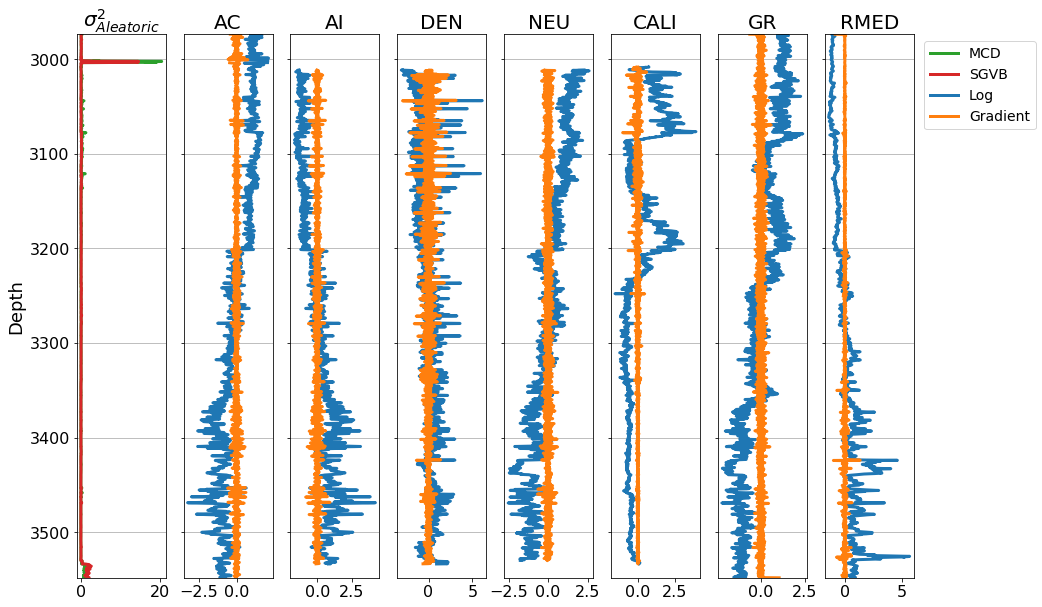

In [9]:
fig, axs = plt.subplots(1, 8, sharey=True, figsize=(15, 10))
for ax in axs:
    ax.set_ylim([depths[-1], depths[0]])
    #ax.tick_params(axis='x',which='both',bottom=False, top=False, labelbottom=False)
    ax.yaxis.grid()
    plt.setp(ax.get_xticklabels(), fontsize=16)

lab1 = axs[0].plot(aleatoric_variance_mc, depths, "#2ca02c",linewidth=3, label="MCD")
lab2 = axs[0].plot(aleatoric_variance_sgvb, depths, "#d62728",linewidth=3, label="SGVB")
axs[0].set_title(r"$\sigma_{Aleatoric}^2$", fontsize=20)
axs[0].set_ylabel("Depth", fontsize=18)
#axs[0].legend(bbox_to_anchor=(-.55,1), loc="upper right", fontsize=14)
plt.setp(axs[0].get_yticklabels(), fontsize=16)

axs[1].plot(dataset_single_well["AC"], depths,linewidth=3)
axs[1].plot(dataset_single_well["AC_gradient"], depths,linewidth=3)
axs[1].set_title("AC", fontsize=20)

axs[2].plot(dataset_single_well["AI"], depths,linewidth=3)
axs[2].plot(dataset_single_well["AI_gradient"], depths,linewidth=3)
axs[2].set_title("AI", fontsize=20)

axs[3].plot(dataset_single_well["DEN"], depths,linewidth=3)
axs[3].plot(dataset_single_well["DEN_gradient"], depths,linewidth=3)
axs[3].set_title("DEN", fontsize=20)

axs[4].plot(dataset_single_well["NEU"], depths,linewidth=3)
axs[4].plot(dataset_single_well["NEU_gradient"], depths,linewidth=3)
axs[4].set_title("NEU", fontsize=20)

axs[5].plot(dataset_single_well["CALI"], depths,linewidth=3)
axs[5].plot(dataset_single_well["CALI_gradient"], depths,linewidth=3)
axs[5].set_title("CALI", fontsize=20)

# BS highly correlated with CALI, they assume pretty much the same values, in the absence of loose rocks
#axs[6].plot(dataset_single_well["BS"], depths, linewidth=3)
#axs[6].plot(dataset_single_well["BS_gradient"], depths, linewidth=3)
#axs[6].set_title("BS", fontsize=20)

axs[6].plot(dataset_single_well["GR"], depths,linewidth=3)
axs[6].plot(dataset_single_well["GR_gradient"], depths,linewidth=3)
axs[6].set_title("GR", fontsize=20)

lab3 = axs[7].plot(dataset_single_well["RMED"], depths,label="Log", linewidth=3)
lab4 = axs[7].plot(dataset_single_well["RMED_gradient"], depths, label="Gradient", linewidth=3)
axs[7].set_title("RMED", fontsize=20);
#axs[7].legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)

labs_total = lab1+lab2+lab3+lab4
labs = [l.get_label() for l in labs_total]
axs[7].legend(labs_total, labs,bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)

#plt.savefig("../../../Figures/qualitative_full_well.pdf",bbox_inches='tight')

### Spike ~3000m

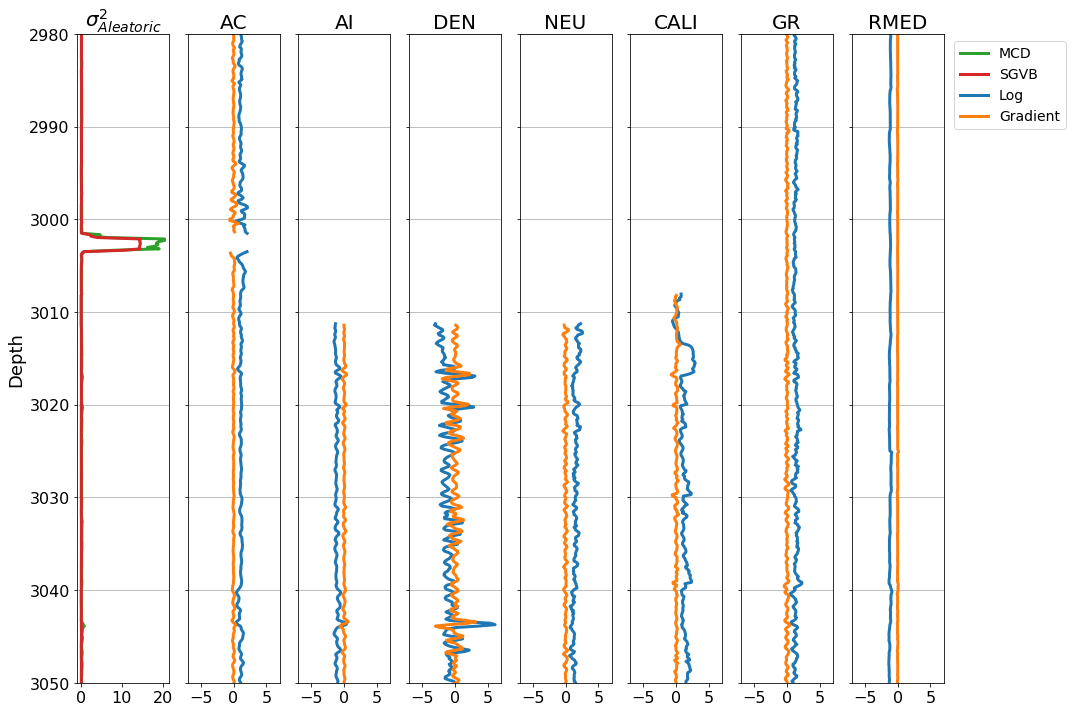

In [14]:
fig, axs = plt.subplots(1, 8, sharey=True, figsize=(15, 10))
for i,ax in enumerate(axs):
    ax.set_ylim([3050, 2980])
    #ax.tick_params(axis='x',which='both',bottom=False, top=False, labelbottom=False)
    ax.yaxis.grid()
    if i != 0:
        ax.set_xlim([-7,7])
        ax.set_xticks([-5,0,5])
    plt.setp(ax.get_xticklabels(), fontsize=16)
    


lab1 = axs[0].plot(aleatoric_variance_mc, depths, "#2ca02c",linewidth=3, label="MCD")
lab2 = axs[0].plot(aleatoric_variance_sgvb, depths, "#d62728",linewidth=3, label="SGVB")
axs[0].set_title(r"$\sigma_{Aleatoric}^2$", fontsize=20)
axs[0].set_ylabel("Depth", fontsize=18)
#axs[0].legend(bbox_to_anchor=(-.55,1), loc="upper right", fontsize=14)
plt.setp(axs[0].get_yticklabels(), fontsize=16)

axs[1].plot(dataset_single_well["AC"], depths, linewidth=3)
axs[1].plot(dataset_single_well["AC_gradient"], depths, linewidth=3)
axs[1].set_title("AC", fontsize=20)

axs[2].plot(dataset_single_well["AI"], depths, linewidth=3)
axs[2].plot(dataset_single_well["AI_gradient"], depths, linewidth=3)
axs[2].set_title("AI", fontsize=20)

axs[3].plot(dataset_single_well["DEN"], depths, linewidth=3)
axs[3].plot(dataset_single_well["DEN_gradient"], depths, linewidth=3)
axs[3].set_title("DEN", fontsize=20)

axs[4].plot(dataset_single_well["NEU"], depths, linewidth=3)
axs[4].plot(dataset_single_well["NEU_gradient"], depths, linewidth=3)
axs[4].set_title("NEU", fontsize=20)

axs[5].plot(dataset_single_well["CALI"], depths, linewidth=3)
axs[5].plot(dataset_single_well["CALI_gradient"], depths, linewidth=3)
axs[5].set_title("CALI", fontsize=20)

#axs[6].plot(dataset_single_well["BS"], depths, linewidth=3)
#axs[6].plot(dataset_single_well["BS_gradient"], depths, linewidth=3)
#axs[6].set_title("BS", fontsize=20)

axs[6].plot(dataset_single_well["GR"], depths, linewidth=3)
axs[6].plot(dataset_single_well["GR_gradient"], depths, linewidth=3)
axs[6].set_title("GR", fontsize=20)

lab3 = axs[7].plot(dataset_single_well["RMED"], depths, label="Log", linewidth=3)
lab4 = axs[7].plot(dataset_single_well["RMED_gradient"], depths, label="Gradient", linewidth=3)
axs[7].set_title("RMED", fontsize=20)
#axs[7].legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14);

labs_total = lab1+lab2+lab3+lab4
labs = [l.get_label() for l in labs_total]
axs[7].legend(labs_total, labs, bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)

plt.tight_layout()
plt.savefig("../../../Figures/qualitative_spike.pdf")


## Resuming measurements

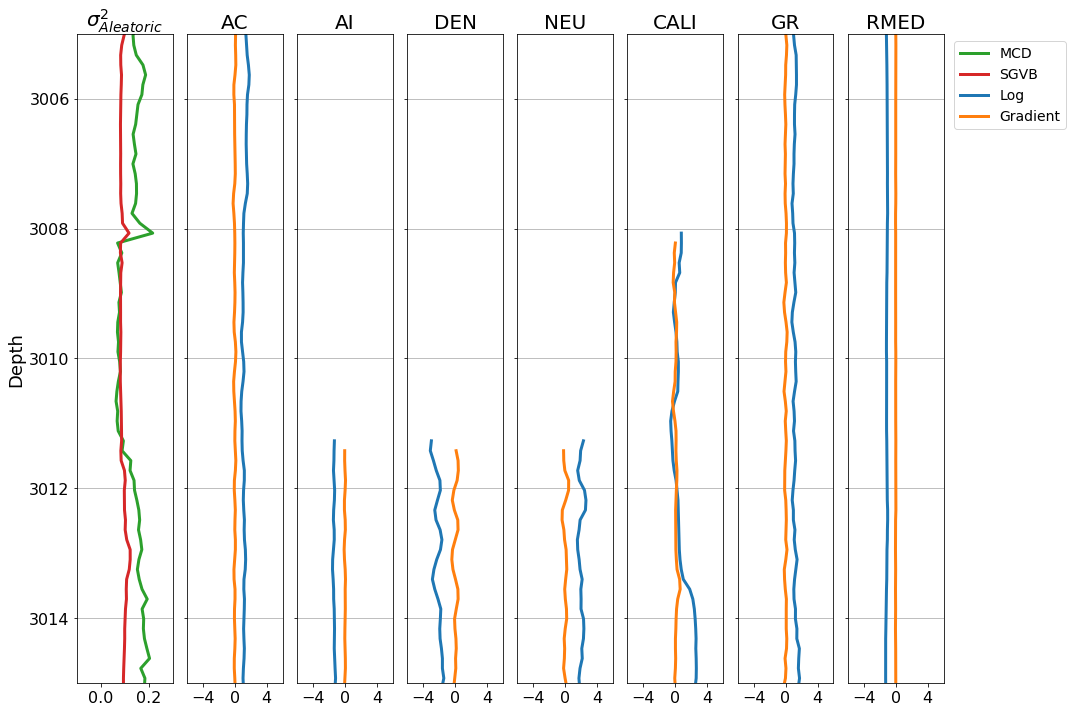

In [13]:
fig, axs = plt.subplots(1, 8, sharey=True, figsize=(15, 10))
for i,ax in enumerate(axs):
    ax.set_ylim([3015, 3005])
    #ax.tick_params(axis='x',which='both',bottom=False, top=False, labelbottom=False)
    ax.yaxis.grid()
    if i != 0:
        ax.set_xlim([-6,6])
        ax.set_xticks([-4,0,4])
    if i == 7:
        ax.set_xlim([-6,6])
        ax.set_xticks([-4,0,4])
    plt.setp(ax.get_xticklabels(), fontsize=16)
    
axs[0].set_xlim([-0.1,0.3])

lab1 = axs[0].plot(aleatoric_variance_mc, depths, "#2ca02c",linewidth=3, label="MCD")
lab2 = axs[0].plot(aleatoric_variance_sgvb, depths, "#d62728",linewidth=3, label="SGVB")
axs[0].set_title(r"$\sigma_{Aleatoric}^2$", fontsize=20)
axs[0].set_ylabel("Depth", fontsize=18)
#axs[0].legend(bbox_to_anchor=(-.55,1), loc="upper right", fontsize=14)
plt.setp(axs[0].get_yticklabels(), fontsize=16)

axs[1].plot(dataset_single_well["AC"], depths, linewidth=3)
axs[1].plot(dataset_single_well["AC_gradient"], depths, linewidth=3)
axs[1].set_title("AC", fontsize=20)

axs[2].plot(dataset_single_well["AI"], depths, linewidth=3)
axs[2].plot(dataset_single_well["AI_gradient"], depths, linewidth=3)
axs[2].set_title("AI", fontsize=20)

axs[3].plot(dataset_single_well["DEN"], depths, linewidth=3)
axs[3].plot(dataset_single_well["DEN_gradient"], depths, linewidth=3)
axs[3].set_title("DEN", fontsize=20)

axs[4].plot(dataset_single_well["NEU"], depths, linewidth=3)
axs[4].plot(dataset_single_well["NEU_gradient"], depths, linewidth=3)
axs[4].set_title("NEU", fontsize=20)

axs[5].plot(dataset_single_well["CALI"], depths, linewidth=3)
axs[5].plot(dataset_single_well["CALI_gradient"], depths, linewidth=3)
axs[5].set_title("CALI", fontsize=20)

#axs[6].plot(dataset_single_well["BS"], depths, linewidth=3)
#axs[6].plot(dataset_single_well["BS_gradient"], depths, linewidth=3)
#axs[6].set_title("BS", fontsize=20)

axs[6].plot(dataset_single_well["GR"], depths, linewidth=3)
axs[6].plot(dataset_single_well["GR_gradient"], depths, linewidth=3)
axs[6].set_title("GR", fontsize=20)

lab3 = axs[7].plot(dataset_single_well["RMED"], depths, label="Log", linewidth=3)
lab4 = axs[7].plot(dataset_single_well["RMED_gradient"], depths, label="Gradient", linewidth=3)
axs[7].set_title("RMED", fontsize=20)
#axs[7].legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14);

labs_total = lab1+lab2+lab3+lab4
labs = [l.get_label() for l in labs_total]
axs[7].legend(labs_total, labs, bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)

plt.tight_layout()
#plt.savefig("../../../Figures/qualitative_resuming_logs.pdf")

## After spike

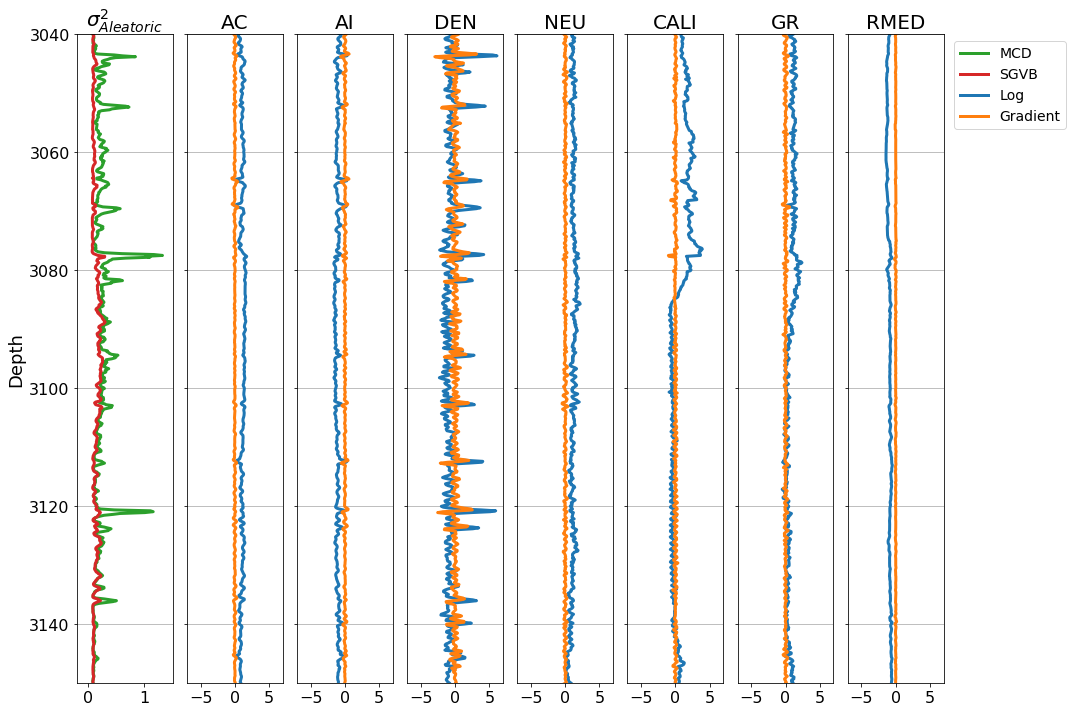

In [17]:
fig, axs = plt.subplots(1, 8, sharey=True, figsize=(15, 10))
for i,ax in enumerate(axs):
    ax.set_ylim([3150, 3040])
    #ax.tick_params(axis='x',which='both',bottom=False, top=False, labelbottom=False)
    ax.yaxis.grid()
    if i != 0:
        ax.set_xlim([-7,7])
        ax.set_xticks([-5,0,5])
    plt.setp(ax.get_xticklabels(), fontsize=16)
    


lab1 = axs[0].plot(aleatoric_variance_mc, depths, "#2ca02c",linewidth=3, label="MCD")
lab2 = axs[0].plot(aleatoric_variance_sgvb, depths, "#d62728",linewidth=3, label="SGVB")
axs[0].set_title(r"$\sigma_{Aleatoric}^2$", fontsize=20)
axs[0].set_ylabel("Depth", fontsize=18)
axs[0].set_xlim([-0.2,1.5])
#axs[0].legend(bbox_to_anchor=(-.55,1), loc="upper right", fontsize=14)
plt.setp(axs[0].get_yticklabels(), fontsize=16)

axs[1].plot(dataset_single_well["AC"], depths, linewidth=3)
axs[1].plot(dataset_single_well["AC_gradient"], depths, linewidth=3)
axs[1].set_title("AC", fontsize=20)

axs[2].plot(dataset_single_well["AI"], depths, linewidth=3)
axs[2].plot(dataset_single_well["AI_gradient"], depths, linewidth=3)
axs[2].set_title("AI", fontsize=20)

axs[3].plot(dataset_single_well["DEN"], depths, linewidth=3)
axs[3].plot(dataset_single_well["DEN_gradient"], depths, linewidth=3)
axs[3].set_title("DEN", fontsize=20)

axs[4].plot(dataset_single_well["NEU"], depths, linewidth=3)
axs[4].plot(dataset_single_well["NEU_gradient"], depths, linewidth=3)
axs[4].set_title("NEU", fontsize=20)

axs[5].plot(dataset_single_well["CALI"], depths, linewidth=3)
axs[5].plot(dataset_single_well["CALI_gradient"], depths, linewidth=3)
axs[5].set_title("CALI", fontsize=20)

#axs[6].plot(dataset_single_well["BS"], depths, linewidth=3)
#axs[6].plot(dataset_single_well["BS_gradient"], depths, linewidth=3)
#axs[6].set_title("BS", fontsize=20)

axs[6].plot(dataset_single_well["GR"], depths, linewidth=3)
axs[6].plot(dataset_single_well["GR_gradient"], depths, linewidth=3)
axs[6].set_title("GR", fontsize=20)

lab3 = axs[7].plot(dataset_single_well["RMED"], depths, label="Log", linewidth=3)
lab4 = axs[7].plot(dataset_single_well["RMED_gradient"], depths, label="Gradient", linewidth=3)
axs[7].set_title("RMED", fontsize=20)
#axs[7].legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14);

labs_total = lab1+lab2+lab3+lab4
labs = [l.get_label() for l in labs_total]
axs[7].legend(labs_total, labs, bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)

plt.tight_layout()
plt.savefig("../../../Figures/qualitative_after_spike.pdf")


## end of the interval 

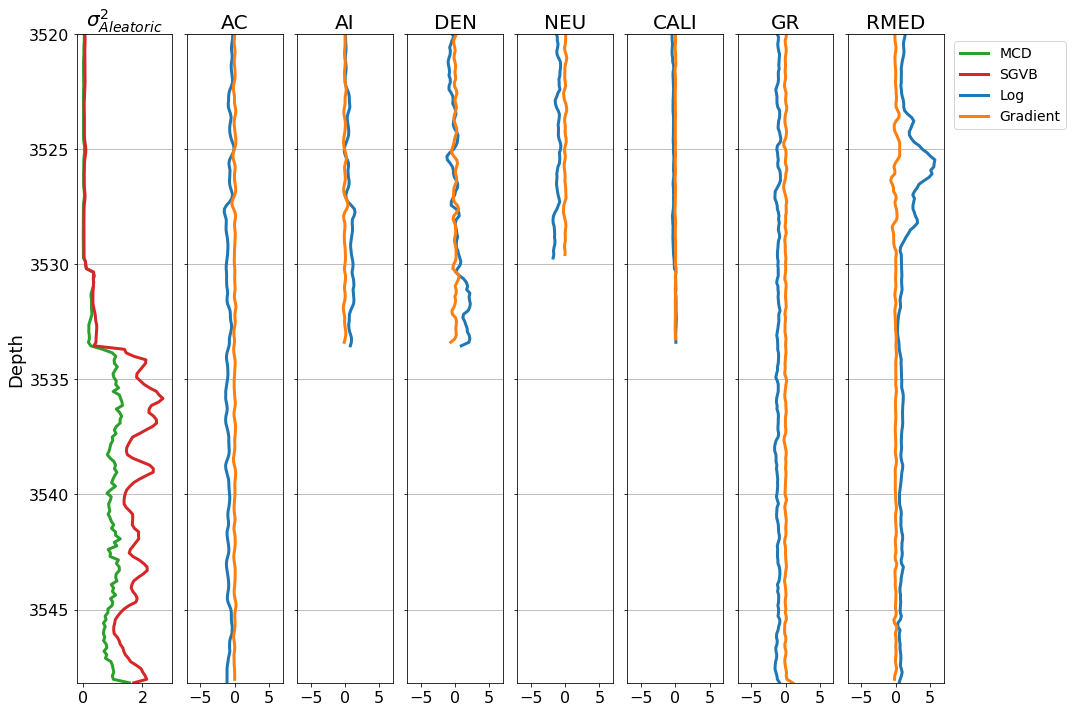

In [19]:
fig, axs = plt.subplots(1, 8, sharey=True, figsize=(15, 10))
for i,ax in enumerate(axs):
    ax.set_ylim([depths[-1], 3520])
    #ax.tick_params(axis='x',which='both',bottom=False, top=False, labelbottom=False)
    ax.yaxis.grid()
    if i != 0:
        ax.set_xlim([-7,7])
        ax.set_xticks([-5,0,5])
    plt.setp(ax.get_xticklabels(), fontsize=16)

lab1 = axs[0].plot(aleatoric_variance_mc, depths, "#2ca02c",linewidth=3, label="MCD")
lab2 = axs[0].plot(aleatoric_variance_sgvb, depths, "#d62728",linewidth=3, label="SGVB")
axs[0].set_xlim([-0.2, 3])
axs[0].set_title(r"$\sigma_{Aleatoric}^2$", fontsize=20)
axs[0].set_ylabel("Depth", fontsize=18)

#axs[0].legend(bbox_to_anchor=(-.55,1), loc="upper right", fontsize=14)
plt.setp(axs[0].get_yticklabels(), fontsize=16);

axs[1].plot(dataset_single_well["AC"], depths,linewidth=3)
axs[1].plot(dataset_single_well["AC_gradient"], depths,linewidth=3)
axs[1].set_title("AC", fontsize=20)

axs[2].plot(dataset_single_well["AI"], depths,linewidth=3)
axs[2].plot(dataset_single_well["AI_gradient"], depths,linewidth=3)
axs[2].set_title("AI", fontsize=20)

axs[3].plot(dataset_single_well["DEN"], depths,linewidth=3)
axs[3].plot(dataset_single_well["DEN_gradient"], depths,linewidth=3)
axs[3].set_title("DEN", fontsize=20)

axs[4].plot(dataset_single_well["NEU"], depths,linewidth=3)
axs[4].plot(dataset_single_well["NEU_gradient"], depths,linewidth=3)
axs[4].set_title("NEU", fontsize=20)

axs[5].plot(dataset_single_well["CALI"], depths,linewidth=3)
axs[5].plot(dataset_single_well["CALI_gradient"], depths,linewidth=3)
axs[5].set_title("CALI", fontsize=20)

#axs[6].plot(dataset_single_well["BS"], depths, linewidth=3)
#axs[6].plot(dataset_single_well["BS_gradient"], depths, linewidth=3)
#axs[6].set_title("BS", fontsize=20)

axs[6].plot(dataset_single_well["GR"], depths,linewidth=3)
axs[6].plot(dataset_single_well["GR_gradient"], depths,linewidth=3)
axs[6].set_title("GR", fontsize=20)

lab3 = axs[7].plot(dataset_single_well["RMED"], depths, label="Log", linewidth=3)
lab4 = axs[7].plot(dataset_single_well["RMED_gradient"], depths, label="Gradient", linewidth=3)
axs[7].set_title("RMED", fontsize=20)
#axs[7].legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)


labs_total = lab1+lab2+lab3+lab4
labs = [l.get_label() for l in labs_total]
axs[7].legend(labs_total, labs,bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14);

plt.tight_layout()
plt.savefig("../../../Figures/qualitative_end.pdf")

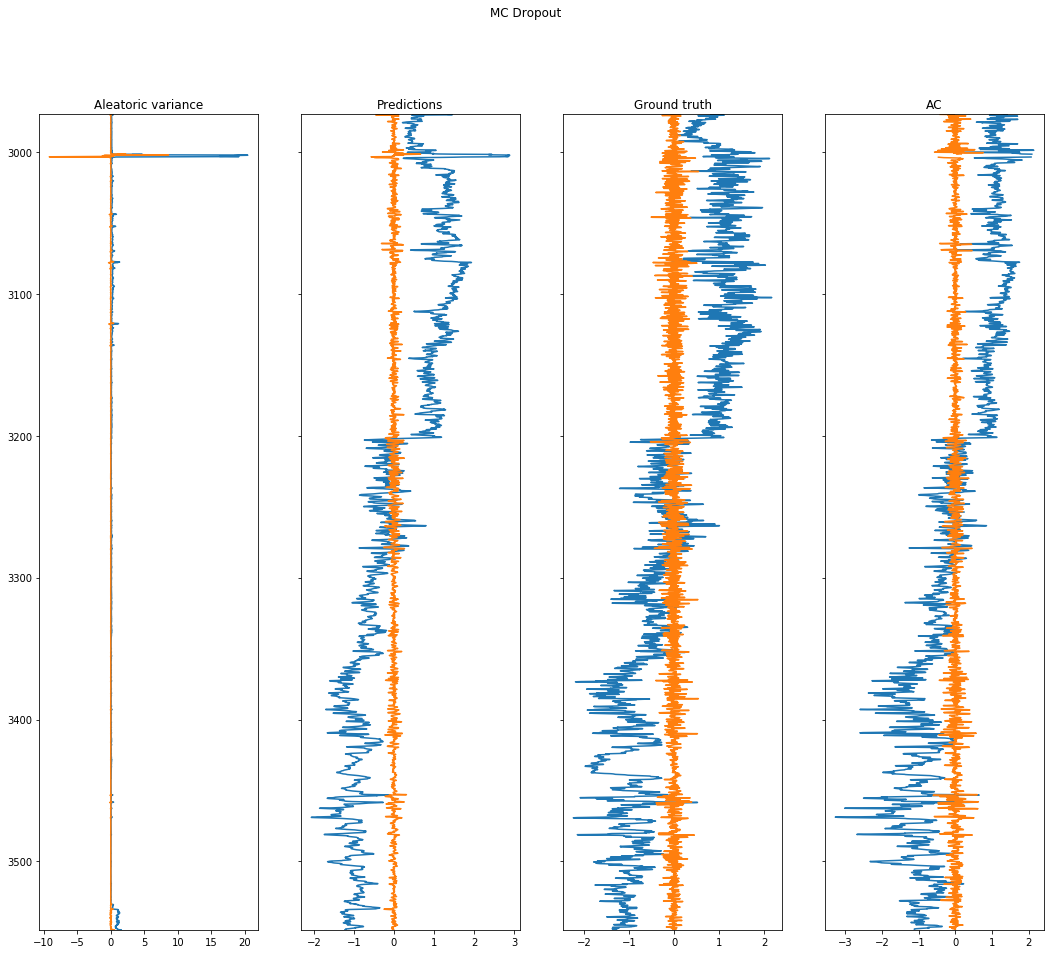

In [17]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 15))
for ax in axs:
    ax.set_ylim([depths[-1], depths[0]])

aleatoric_variance_mc_gradient = np.gradient(aleatoric_variance_mc)
predictions_mc_gradient = np.gradient(predictions_mc)
y_test_gradient = np.gradient(dataset_single_well["ACS"])

axs[0].plot(aleatoric_variance_mc, depths)
axs[0].plot(aleatoric_variance_mc_gradient, depths)
axs[0].set_title("Aleatoric variance")

axs[1].plot(predictions_mc, depths)
axs[1].plot(predictions_mc_gradient, depths)
axs[1].set_title("Predictions")

axs[2].plot(y_test, depths)
axs[2].plot(y_test_gradient, depths)
axs[2].set_title("Ground truth")

axs[3].plot(dataset_single_well["AC"], depths)
axs[3].plot(dataset_single_well["AC_gradient"], depths)
axs[3].set_title("AC")

plt.suptitle("MC Dropout");

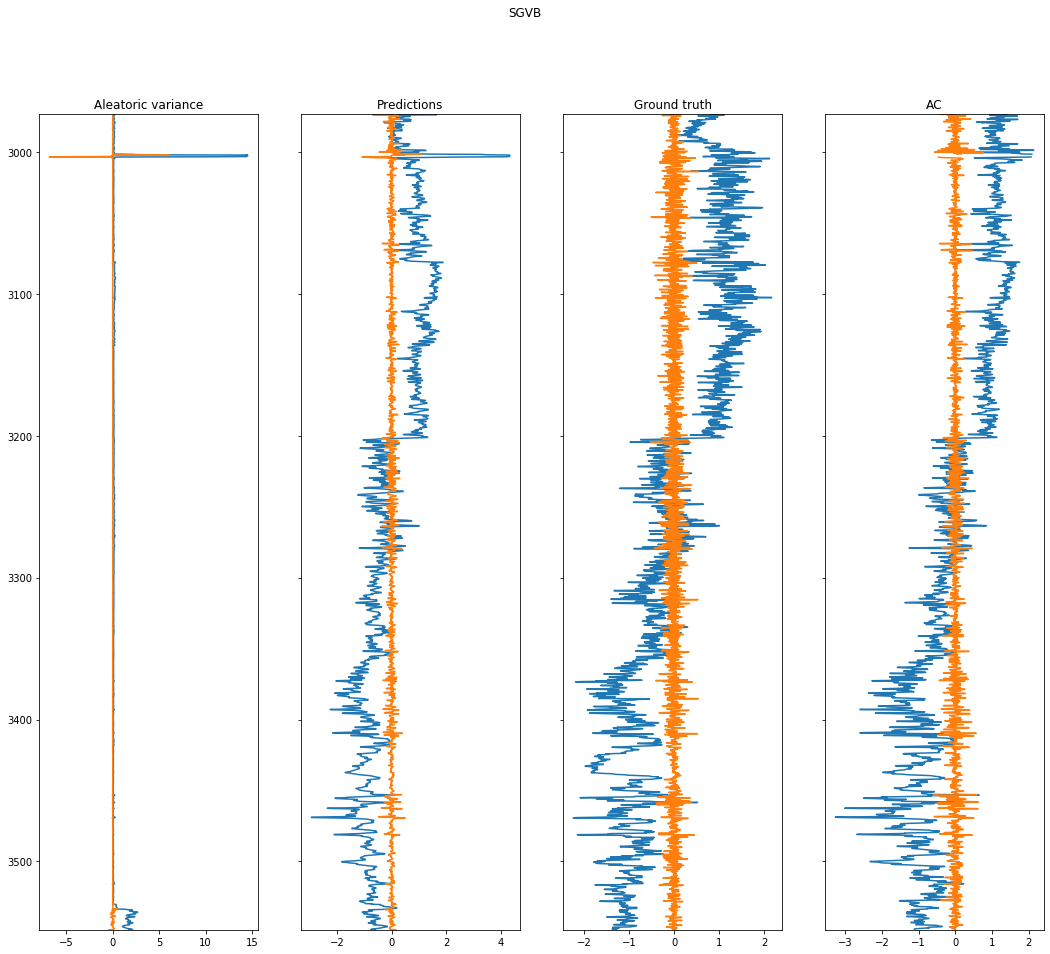

In [18]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 15))
for ax in axs:
    ax.set_ylim([depths[-1], depths[0]])

aleatoric_variance_sgvb_gradient = np.gradient(aleatoric_variance_sgvb)
predictions_sgvb_gradient = np.gradient(predictions_sgvb)

axs[0].plot(aleatoric_variance_sgvb, depths)
axs[0].plot(aleatoric_variance_sgvb_gradient, depths)
axs[0].set_title("Aleatoric variance")

axs[1].plot(predictions_sgvb, depths)
axs[1].plot(predictions_sgvb_gradient, depths)
axs[1].set_title("Predictions")

axs[2].plot(y_test, depths)
axs[2].plot(y_test_gradient, depths)
axs[2].set_title("Ground truth")

axs[3].plot(dataset_single_well["AC"], depths)
axs[3].plot(dataset_single_well["AC_gradient"], depths)
axs[3].set_title("AC")

plt.suptitle("SGVB");